# AI-Powered Brain Tumor Classification: Advanced MRI Analysis with CNNs

## Overview
This notebook demonstrates how **Artificial Intelligence (AI)** and **Deep Learning** can revolutionize the detection and classification of brain tumors from MRI images. Using **Convolutional Neural Networks (CNNs)** and **Transfer Learning (TL)**, we aim to tackle the complexities of brain tumor diagnosis with a highly accurate and automated approach.

## Context
Brain tumors are among the most aggressive and complex diseases, presenting significant challenges in diagnosis due to variations in size, shape, and location. Manual examination of MRI scans is not only time-consuming but also prone to errors, especially in regions with limited access to skilled radiologists and neurosurgeons. By leveraging state-of-the-art AI techniques, this notebook seeks to overcome these challenges, providing a scalable and efficient solution for medical professionals worldwide.

## Objectives
- **Detect and classify brain tumors** into four distinct classes using CNNs and Transfer Learning.
- **Address the diagnostic challenges** posed by tumor variability and resource constraints.
- **Provide the foundation** for a cloud-based automated diagnostic system to support healthcare practitioners.

## Key Highlights
- **Dataset**: A curated MRI dataset for brain tumor classification, acknowledging contributions from Navoneel Chakrabarty and Swati Kanchan.
- **Techniques Used**: Deep Learning methods, including CNNs and Transfer Learning, to optimize classification accuracy.
- **Goal**: Build a robust and reliable AI model that enhances diagnostic efficiency and accuracy.

## Team Acknowledgements
This work is inspired by the contributions of:
- Sartaj Bhuvaji  
- Ankita Kadam  
- Prajakta Bhumkar  
- Sameer Dedge  

Special thanks to the open-source community for providing datasets and resources that enable advancements in medical AI.

---

By automating MRI analysis with cutting-edge AI technologies, this notebook aims to support faster, more reliable diagnostic processes, ultimately contributing to improved patient care and outcomes.


## Libraries and Tools Used  

This project leverages a range of Python libraries and tools for data manipulation, visualization, image processing, and building a robust Deep Learning pipeline. Below is an overview of the purpose of each library or module imported:  

- **`matplotlib.pyplot`**: A comprehensive library for creating static, animated, and interactive visualizations to plot data insights and results.  
- **`numpy`**: A powerful numerical computing library used for handling arrays and performing mathematical operations efficiently.  
- **`pandas`**: Essential for data manipulation and analysis, providing DataFrame structures for handling tabular data.  
- **`seaborn`**: Built on Matplotlib, it simplifies the creation of informative and attractive statistical graphics.  
- **`cv2` (OpenCV)**: A computer vision library used here for image preprocessing, including resizing, augmentations, and other transformations.  
- **`tensorflow`**: A core deep learning framework used for building and training neural networks, including image classification models.  
- **`ImageDataGenerator`**: A TensorFlow utility for augmenting image datasets to improve model generalization.  
- **`tqdm`**: Provides progress bars to track the status of loops and iterations for enhanced user experience.  
- **`os`**: A standard library for interacting with the operating system, used for file and directory management.  
- **`sklearn` (scikit-learn)**: Provides utilities like dataset shuffling, train-test splitting, and metrics for evaluating model performance.  
- **`EfficientNetB0`**: A pre-trained model from TensorFlow's applications module, used for Transfer Learning in this project.  
- **`EarlyStopping`, `ReduceLROnPlateau`, `TensorBoard`, `ModelCheckpoint`**: TensorFlow callbacks to enhance training by preventing overfitting, reducing learning rates, monitoring progress, and saving the best models.  
- **`classification_report`, `confusion_matrix`**: Evaluation tools from scikit-learn for analyzing model performance and generating detailed metrics.  
- **`ipywidgets`**: Used for creating interactive widgets within Jupyter notebooks, enhancing the user experience.  
- **`io` and `PIL.Image`**: Utilities for handling image input and processing.  
- **`IPython.display`**: Used for rendering rich outputs like images or clearing notebook outputs dynamically.  
- **`warnings`**: To filter and suppress unnecessary warnings, ensuring a clean and focused workflow.  

These tools work together to streamline the data analysis, preprocessing, model training, and evaluation process, ensuring efficient and reproducible results.  


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

## Exploring and Extracting Dataset Files  

To work with the dataset, the first step is to ensure that the data files are accessible. The following code iterates through the directory structure to list all the files contained within a specified archive. Additionally, if the dataset is provided in a compressed format, such as `.zip`, it will be extracted automatically for easier access.  

### Key Steps:  
1. **Check and Extract**: If the dataset is provided as a compressed file (`archive.zip`), the script will extract it into the working directory using the `zipfile` module.  
2. **List Files**: The `os.walk()` function is then used to traverse the directory structure, printing the full path of each file for verification.

In [2]:
import os
import zipfile

# Specify the path to the compressed archive
archive_path = 'archive.zip'

# Check if the file is a zip and extract it
if os.path.exists(archive_path) and zipfile.is_zipfile(archive_path):
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        print("Extracting files...")
        zip_ref.extractall()
        print("Extraction complete!")

# Walk through the extracted directory and list all files
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Extracting files...
Extraction complete!
./archive.zip
./.config/active_config
./.config/.last_survey_prompt.yaml
./.config/.last_opt_in_prompt.yaml
./.config/gce
./.config/config_sentinel
./.config/default_configs.db
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/.last_update_check.json
./.config/logs/2025.01.09/14.24.30.432184.log
./.config/logs/2025.01.09/14.24.31.105470.log
./.config/logs/2025.01.09/14.24.19.246185.log
./.config/logs/2025.01.09/14.24.06.954373.log
./.config/logs/2025.01.09/14.24.17.896417.log
./.config/logs/2025.01.09/14.23.45.755949.log
./.config/configurations/config_default
./Testing/glioma_tumor/image(25).jpg
./Testing/glioma_tumor/image(99).jpg
./Testing/glioma_tumor/image(94).jpg
./Testing/glioma_tumor/image(30).jpg
./Testing/glioma_tumor/image(92).jpg
./Testing/glioma_tumor/image(59).jpg
./Testing/glioma_tumor/image(84).jpg
./Testing/glioma_tumor/image(22).jpg
./Testing/glioma_tumor/image(50).jpg
./Testing/glioma_tumor/ima

* **zipfile.ZipFile:** This module is used to handle .zip files. The script checks if the specified file is a valid zip archive and extracts its contents if needed.
* **os.walk():** Recursively walks through the directory and subdirectories, providing access to directory names and filenames.
* **Dynamic Extraction:** Automatically extracts the archive if it hasn't been done previously, ensuring that the dataset is ready for use.
This approach ensures that the dataset is both unpacked (if compressed) and verified, providing a clear list of available files for subsequent processing.

## Custom Color Palettes  

This project incorporates custom color palettes to enhance the visual appeal and consistency of data visualizations. These palettes are designed with specific hex color codes and cater to different thematic purposes:  

- **Dark Palette**: A range of grayscale tones, ideal for creating neutral or minimalist visuals.  
- **Red Palette**: A gradient of red hues, often used to highlight critical or warning-related information.  
- **Green Palette**: A spectrum of green shades, symbolizing positive outcomes or healthy states.  

### Purpose and Visualization  
The defined palettes provide a cohesive and thematic color scheme across the project. By using visualization tools, these palettes are previewed to ensure they complement the overall design and improve interpretability.  

### Benefits  
1. **Consistency**: Applying the same palettes across all visualizations creates a uniform and professional look.  
2. **Clarity**: Carefully selected colors enhance the readability and impact of charts and graphs.  
3. **Customizability**: The use of hex codes allows precise control over color selection, ensuring the palettes align with the project's requirements.  

Custom palettes not only improve the aesthetic quality of the visualizations but also make it easier to convey insights effectively.  

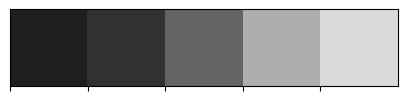

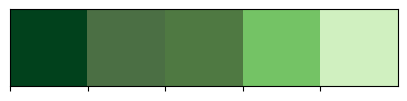

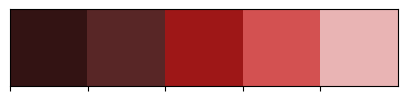

In [3]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)